<div style="padding:20px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#f88158;overflow:hidden;font-weight:500">Introduction</div>
<br>
<div align='center'><img src="../images/NBA_Draft_Combine_logo.jpg"/></div>
The NBA Combine is ....

<div style="padding:20px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#f88158;overflow:hidden;font-weight:500">Data Description</div>
<br>

<div style="padding:20px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#74bde0;overflow:hidden;font-weight:500">Data Description</div>
<br>
<li><b>player_id</b>: Unique identifier.</li>
<li><b>yearDraft</b>: The year the player got drafted into the NBA.</li>
<li><b>yearCombine</b>: The year the player joined the NBA Combine (the same as yearDraft).</li>
<li><b>numberPickOverall</b>: The overall pick of said player.</li>
<li><b>namePlayer</b>: Full name of the player.</li>
<li><b>position</b>: The position the player is registered at.</li>
<li><b>height</b>: The player's height without shoes in inches.</li>
<li><b>weight</b>: The player's weight in lbs.</li>
<li><b>wingspan</b>: The player's wingspan in inches.</li>
<li><b>reach_standing</b>: The reach of a player's hand when standing, in inches.</li>
<li><b>standing_vertical</b>: The height of a player's jump from standing, in inches.</li>
<li><b>max_vertical</b>: The height of a player's maximum jump, usually with a short run, in inches.</li>
<li><b>bench_reps</b>: The maximum reps a player can do with a barbell weight of 135lbs.</li>
<li><b>body_fat_pct</b>: The player's body fat percentage.</li>
<li><b>drafted</b>: The target variable, whether or not a player in the combine got drafted in the NBA Draft.</li>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.impute import SimpleImputer

import sys

sys.path.insert(1, '..')
sys.path.insert(1, 'C:/Users/61411/personal-project/NBA/my_packages/')

import joblib

In [77]:
sys.path

['c:\\Users\\61411\\personal-project\\NBA\\notebooks',
 'C:/Users/61411/personal-project/NBA/my_packages/',
 '..',
 'C:/Users/61411/personal-project/NBA/my_packages/',
 '..',
 'c:\\Users\\61411\\anaconda3\\python39.zip',
 'c:\\Users\\61411\\anaconda3\\DLLs',
 'c:\\Users\\61411\\anaconda3\\lib',
 'c:\\Users\\61411\\anaconda3',
 '',
 'c:\\Users\\61411\\anaconda3\\lib\\site-packages',
 'c:\\Users\\61411\\anaconda3\\lib\\site-packages\\win32',
 'c:\\Users\\61411\\anaconda3\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\61411\\anaconda3\\lib\\site-packages\\Pythonwin']

In [78]:
train = pd.read_csv('../datasets/draft_combine_train.csv')

In [79]:
train_copy = train.copy()

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    1116 non-null   float64
 1   player_name                  1116 non-null   object 
 2   yearDraft                    650 non-null    float64
 3   yearCombine                  1116 non-null   int64  
 4   numberPickOverall            650 non-null    float64
 5   position                     1112 non-null   object 
 6   height                       1108 non-null   float64
 7   weight                       1106 non-null   float64
 8   wingspan                     1109 non-null   float64
 9   reach_standing               1108 non-null   float64
 10  standing_vertical            984 non-null    float64
 11  max_vertical                 983 non-null    float64
 12  bench_reps                   873 non-null    float64
 13  timeLaneAgility   

# EDA

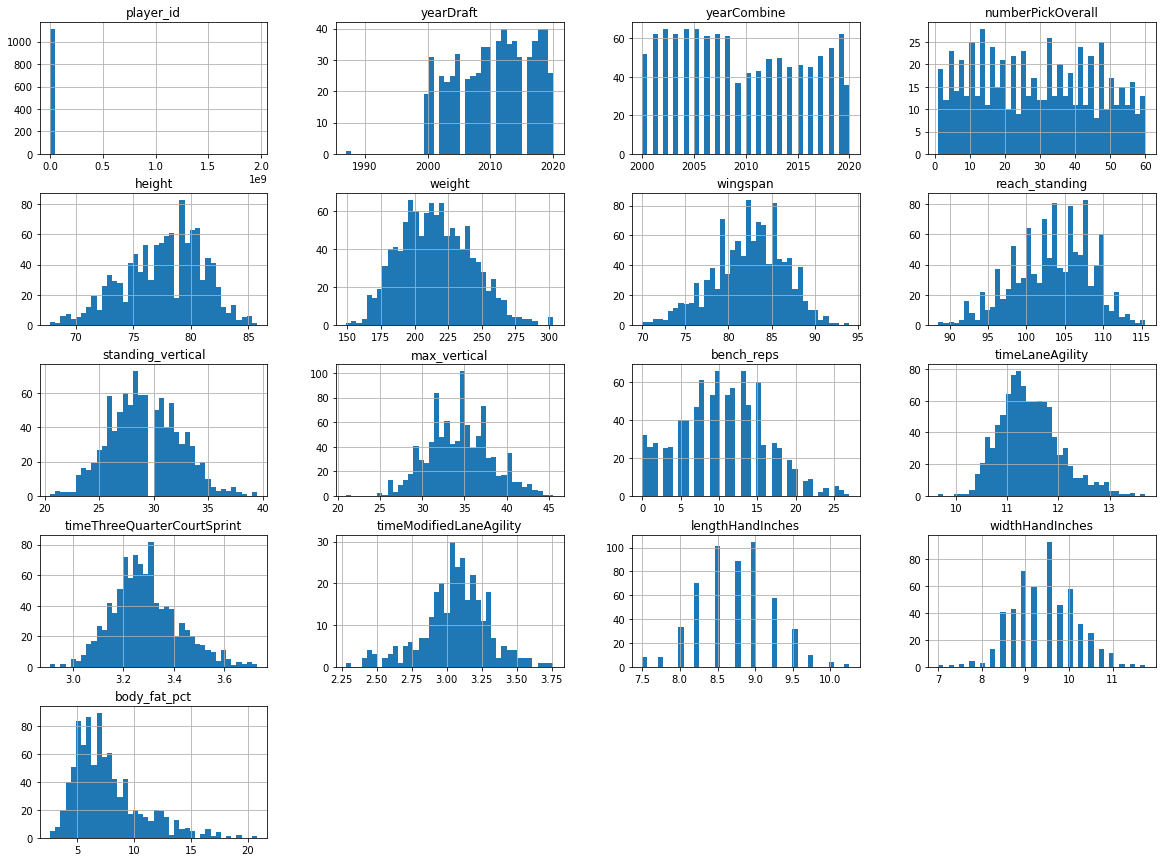

In [81]:
train.hist(bins=40, figsize=(20,15));

Few things noticed from these histograms:
<li>Many histograms are actually quite close to normal with right skewness.</li>
<li><i>'height'</i> is the only column with some left skewness. I guess it makes sense that most NBA prospects are going to be extremely tall.</li>
<li>There is a year in <i>yearDraft</i> that doesn't seem like it belongs there. As all the the years are 2000 onwards, except for that one.</li>


Let's quickly see the relationship between two variables. Percentage body fat and vertical leap seems to be a good start. We'd expect a negative slope considering that if you're fatter, it's probably harder to jump higher. 

In [82]:
# check that yearDraft
train[train.yearDraft < 2000]

,player_id,player_name,yearDraft,yearCombine,numberPickOverall,position,height,weight,wingspan,reach_standing,standing_vertical,max_vertical,bench_reps,timeLaneAgility,timeThreeQuarterCourtSprint,timeModifiedLaneAgility,lengthHandInches,widthHandInches,body_fat_pct,drafted
526,199.0,Reggie Williams,1987.0,2008,4.0,SG,75.25,199.0,81.25,103.0,31.5,36.5,15.0,11.32,3.07,NaN,NaN,NaN,5.3,True


Looks like there's a mix up in the data. There had been a couple of Reggie Williams in the NBA. This particular Reggie, is someone who was drafted back in 1987, and there's a Reggie who attended the combine in 2008. A quick search revealed that Reggie William went undrafted, although eventually signed with a team after being undrafted. 

In [83]:
# change yearDraft to NaN
train.loc[train.yearDraft < 2000, 'numberPickOverall'] = np.nan
train.loc[train.yearDraft < 2000, 'drafted'] = False
train.loc[train.yearDraft < 2000, 'yearDraft'] = np.nan


In [84]:
train.iloc[526]

player_id                                199.0
player_name                    Reggie Williams
yearDraft                                  NaN
yearCombine                               2008
numberPickOverall                          NaN
position                                    SG
height                                   75.25
weight                                   199.0
wingspan                                 81.25
reach_standing                           103.0
standing_vertical                         31.5
max_vertical                              36.5
bench_reps                                15.0
timeLaneAgility                          11.32
timeThreeQuarterCourtSprint               3.07
timeModifiedLaneAgility                    NaN
lengthHandInches                           NaN
widthHandInches                            NaN
body_fat_pct                               5.3
drafted                                  False
Name: 526, dtype: object

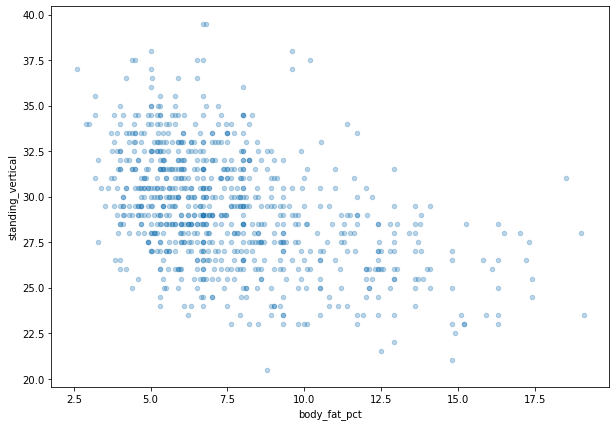

In [85]:
train.plot(kind='scatter', x='body_fat_pct', y='standing_vertical', alpha=0.3, figsize=(10,7));

This looks reasonable. 

<AxesSubplot:xlabel='body_fat_pct', ylabel='standing_vertical'>

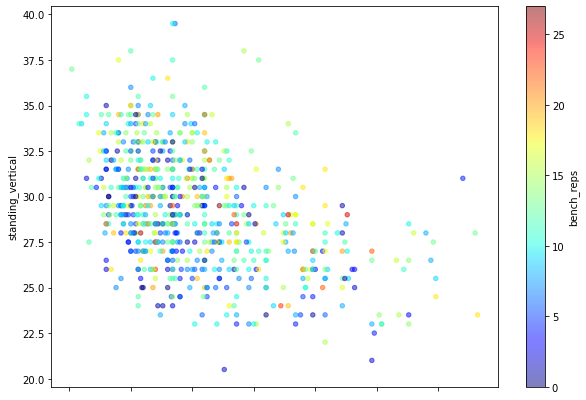

In [86]:
train.plot(kind='scatter', x='body_fat_pct', y='standing_vertical',
           alpha=0.5, figsize=(10, 7), c='bench_reps', cmap=plt.get_cmap("jet"))


<AxesSubplot:>

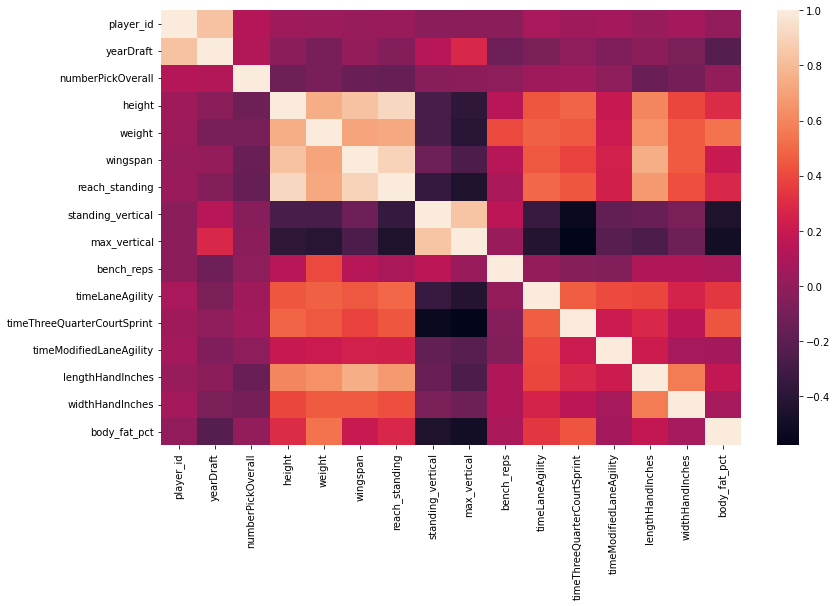

In [87]:
plt.figure(figsize=(13,8))
sns.heatmap(train.select_dtypes(include='float64').corr())

# Missing Values

## yearDraft & numberPickOverall

In [88]:
train.isna().sum()

player_id                        0
player_name                      0
yearDraft                      467
yearCombine                      0
numberPickOverall              467
position                         4
height                           8
weight                          10
wingspan                         7
reach_standing                   8
standing_vertical              132
max_vertical                   133
bench_reps                     243
timeLaneAgility                139
timeThreeQuarterCourtSprint    139
timeModifiedLaneAgility        809
lengthHandInches               596
widthHandInches                596
body_fat_pct                   194
drafted                          0
dtype: int64

<i>yearDraft</i> and <i>numberPickOverall</i> are missing together, this is because those missing values are for players who ended up undrafted. 

## slugPosition

In [89]:
train[train.position.isna()]

,player_id,player_name,yearDraft,yearCombine,numberPickOverall,position,height,weight,wingspan,reach_standing,standing_vertical,max_vertical,bench_reps,timeLaneAgility,timeThreeQuarterCourtSprint,timeModifiedLaneAgility,lengthHandInches,widthHandInches,body_fat_pct,drafted
88,1629681.0,Killian Tillie,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
125,1629643.0,Chuma Okeke,2019.0,2019,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
830,201146.0,Jianlian Yi,2007.0,2007,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1025,101122.0,Danny Granger,2005.0,2005,17.0,NaN,79.5,225.4,85.5,103.0,31.0,34.0,10.0,10.84,3.34,NaN,NaN,NaN,NaN,True


In [90]:
unique_position = train.position.unique()
unique_position

array(['PG', 'SG', 'SF', 'SG-PG', 'PF-C', 'SF-PF', 'PF', 'C', 'PG-SG',
       'PF-SF', 'SF-SG', nan, 'C-PF', 'SG-SF'], dtype=object)

There are some positions that are double, meaning the players can play two positions with the first position being the primary position. We can just create another column to capture this information instead of having 14 unique positions.

In [91]:
train[['primary_position', 'secondary_position']] = train['position'].str.split('-', expand=True)

# height

In [92]:
train[train.height.isna()]

,player_id,player_name,yearDraft,yearCombine,numberPickOverall,position,height,weight,wingspan,reach_standing,...,bench_reps,timeLaneAgility,timeThreeQuarterCourtSprint,timeModifiedLaneAgility,lengthHandInches,widthHandInches,body_fat_pct,drafted,primary_position,secondary_position
32,203458.0,Alex Len,2013.0,2013,5.0,C,NaN,NaN,87.5,NaN,...,NaN,NaN,NaN,NaN,9.0,10.75,6.4,True,C,None
88,1629681.0,Killian Tillie,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
125,1629643.0,Chuma Okeke,2019.0,2019,16.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
232,12015.0,Blake Stepp,NaN,2004,NaN,PG,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,False,PG,None
286,1629630.0,Ja Morant,2019.0,2019,2.0,PG,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,PG,None
816,2740.0,Andris Biedrins,2004.0,2004,11.0,C,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.3,True,C,None
830,201146.0,Jianlian Yi,2007.0,2007,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
1030,200969.0,Mustafa Al-Sayyad,NaN,2005,NaN,PF-C,NaN,NaN,NaN,NaN,...,NaN,11.56,3.42,NaN,NaN,NaN,NaN,False,PF,C


In [93]:
combine_measure = train.columns[6:-3]

# check if they attended the Combine
train['attend_combine'] = (train[combine_measure].notna().sum(axis=1) > 0)

In [94]:
train.attend_combine.value_counts()

True     1112
False       4
Name: attend_combine, dtype: int64

height, weight, wingspan, and reach_standing             

can be imputed with the median

In [95]:
train.isna().sum()

player_id                        0
player_name                      0
yearDraft                      467
yearCombine                      0
numberPickOverall              467
position                         4
height                           8
weight                          10
wingspan                         7
reach_standing                   8
standing_vertical              132
max_vertical                   133
bench_reps                     243
timeLaneAgility                139
timeThreeQuarterCourtSprint    139
timeModifiedLaneAgility        809
lengthHandInches               596
widthHandInches                596
body_fat_pct                   194
drafted                          0
primary_position                 4
secondary_position             720
attend_combine                   0
dtype: int64

In [96]:
def histplots_with_hue(data, cols: list, hue: str):
    fig, ax = plt.subplots(len(cols), figsize=(3*len(cols), 3*len(cols)))

    for i, col_name in enumerate(cols):
        sns.histplot(data=data, x=col_name, hue=hue, multiple='fill', ax=ax[i])
        sns.move_legend(ax[i], loc=(1.05, 0.5))

    fig.tight_layout()

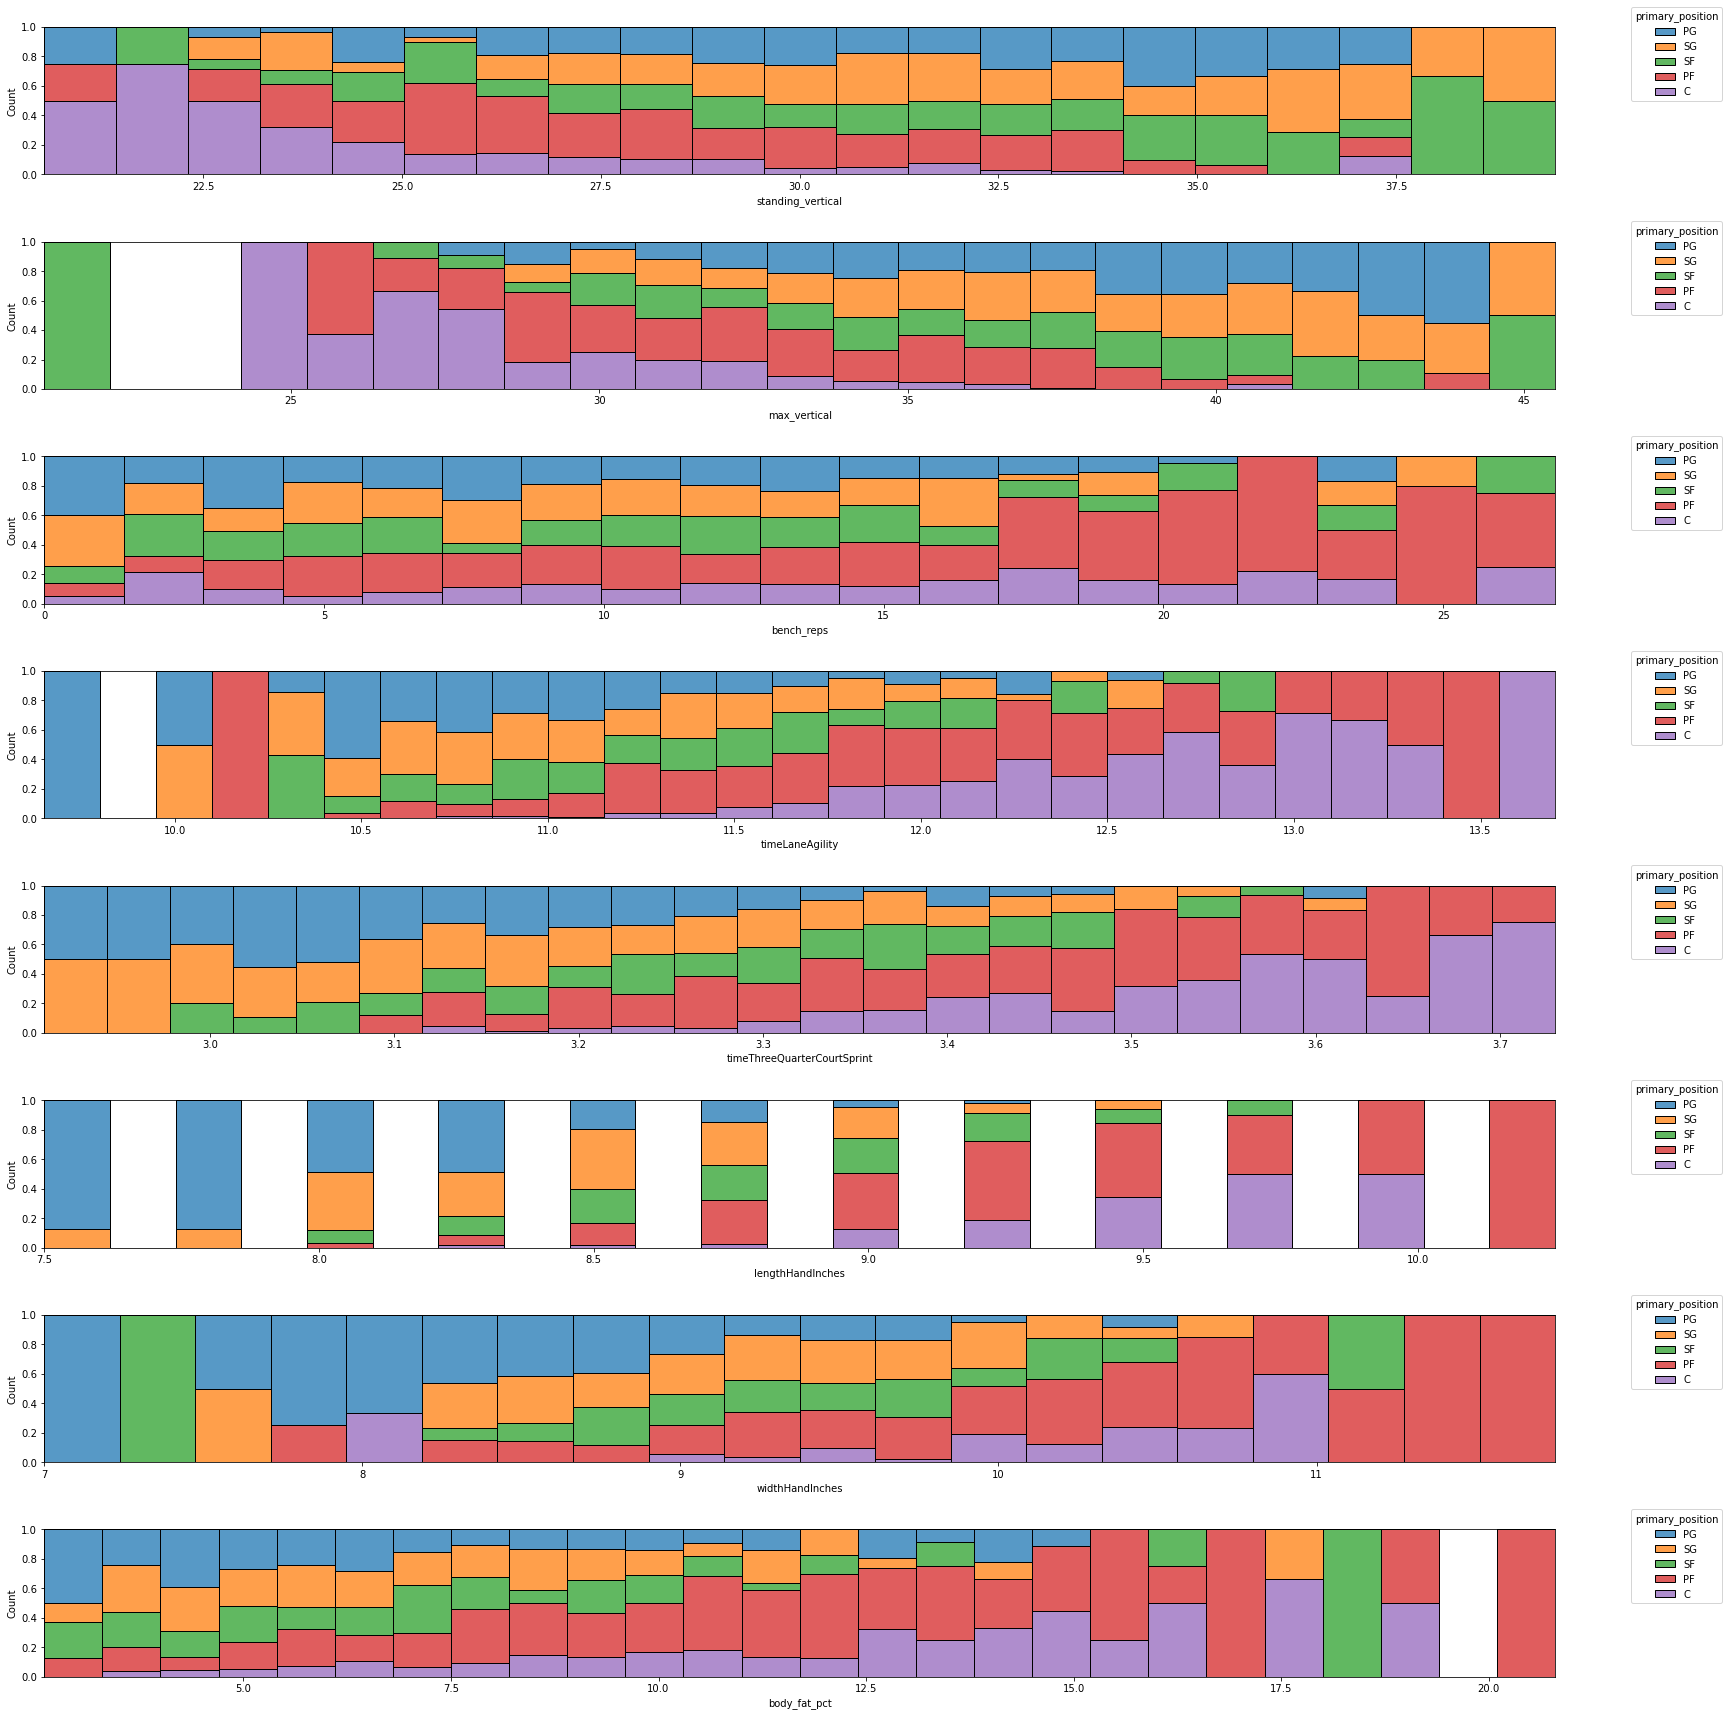

In [97]:
col_list = [
    'standing_vertical', 'max_vertical', 'bench_reps', 'timeLaneAgility', 'timeThreeQuarterCourtSprint', 'lengthHandInches', 'widthHandInches','body_fat_pct'
]

histplots_with_hue(train, col_list, 'primary_position')

In [98]:
train[train.max_vertical < 25]

,player_id,player_name,yearDraft,yearCombine,numberPickOverall,position,height,weight,wingspan,reach_standing,...,timeLaneAgility,timeThreeQuarterCourtSprint,timeModifiedLaneAgility,lengthHandInches,widthHandInches,body_fat_pct,drafted,primary_position,secondary_position,attend_combine
124,2065.0,Mike Smith,2000.0,2000,35.0,SF,78.5,198.0,80.5,103.0,...,11.32,3.22,NaN,NaN,NaN,NaN,True,SF,None,True


In [99]:
train[train.timeLaneAgility < 10]

,player_id,player_name,yearDraft,yearCombine,numberPickOverall,position,height,weight,wingspan,reach_standing,...,timeLaneAgility,timeThreeQuarterCourtSprint,timeModifiedLaneAgility,lengthHandInches,widthHandInches,body_fat_pct,drafted,primary_position,secondary_position,attend_combine
344,2249.0,Jamison Brewer,2001.0,2001,40.0,PG,74.5,178.0,80.75,102.5,...,9.65,3.15,NaN,NaN,NaN,6.7,True,PG,None,True
792,1629648.0,Jordan Bone,2019.0,2019,57.0,SG,73.5,179.0,75.25,95.0,...,9.97,3.08,2.78,7.5,9.25,5.0,True,SG,None,True


In [100]:
train[train.standing_vertical > train.max_vertical][['player_name', 'standing_vertical', 'max_vertical']]

,player_name,standing_vertical,max_vertical
58,Marko Tomas,32.0,31.5
124,Mike Smith,33.0,21.0
536,Donnell Harvey,33.0,32.5
637,Festus Ezeli,34.0,33.5
662,Shawne Williams,32.0,31.0
700,Craig Smith,30.0,29.5
795,Yemi Nicholson,26.5,26.0
983,Keith Langford,32.0,29.5


<li>Most centers (C) and power forwards (PF) have lower verticals, as expected. They're bigger and heavier.</li>
<li>Guards and Small Forwards (SF) tend to have higher verticals.</li>
<li>Some players have higher standing vertical jump than max vertical jump which is the jump after a run-up. This is probably due to poor technique when jumping. Most notably, Mike Smith.</li>

All in all, the data make sense so we can be confident that the data that exist, can be trusted.

Other than natural physical attributes like height and weight, I'm not imputing missing values. This is because I want the model I build to be able to pick out the special players that are going to be drafted and by imputing them, considering a significant portion of the data is missing, I'll add too much bias and reduce whatever selected model's ability to make a good prediction.

In [102]:
from my_packages import my_transfomers
from my_transfomers import CustomTransformer
from my_transfomers import TopFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    1116 non-null   float64
 1   player_name                  1116 non-null   object 
 2   yearDraft                    649 non-null    float64
 3   yearCombine                  1116 non-null   int64  
 4   numberPickOverall            649 non-null    float64
 5   position                     1112 non-null   object 
 6   height                       1108 non-null   float64
 7   weight                       1106 non-null   float64
 8   wingspan                     1109 non-null   float64
 9   reach_standing               1108 non-null   float64
 10  standing_vertical            984 non-null    float64
 11  max_vertical                 983 non-null    float64
 12  bench_reps                   873 non-null    float64
 13  timeLaneAgility   

In [104]:
players = pd.read_csv('../datasets/draft_combine_train.csv')
players_label = players['drafted']
players = players.drop(['player_id', 'player_name', 'yearDraft', 'numberPickOverall', 'drafted'], axis=1)


num_other_cols = ['yearCombine', 'standing_vertical', 'max_vertical', 'bench_reps', 'timeLaneAgility', 'timeThreeQuarterCourtSprint', 'timeModifiedLaneAgility', 'lengthHandInches', 'widthHandInches', 'body_fat_pct']
cat_cols = players.select_dtypes(exclude=['float64', 'int64']).columns
num_impute_cols = ['height', 'weight', 'wingspan', 'reach_standing']

In [ ]:
# drop_cols = ['player_id', 'player_name', 'yearDraft', 'numberPickOverall', 'drafted']

# joblib.dump(drop_cols, 'drop_cols.pkl')
# joblib.dump(cat_cols, 'cat_cols.pkl')
# joblib.dump(num_impute_cols, 'num_impute_cols.pkl')

['num_impute_cols.pkl']

In [ ]:
players

,yearCombine,position,height,weight,wingspan,reach_standing,standing_vertical,max_vertical,bench_reps,timeLaneAgility,timeThreeQuarterCourtSprint,timeModifiedLaneAgility,lengthHandInches,widthHandInches,body_fat_pct
0,2011,PG,73.50,187.6,77.50,99.0,28.5,34.0,9.0,11.05,3.17,NaN,8.50,9.25,5.6
1,2012,SG,75.25,201.8,80.00,100.0,33.0,39.0,8.0,10.95,3.28,NaN,8.50,9.00,6.0
2,2000,PG,70.50,166.0,72.00,94.5,36.0,42.5,6.0,10.48,3.06,NaN,NaN,NaN,NaN
3,2011,SF,80.75,221.2,81.50,104.5,25.5,31.5,4.0,11.05,3.29,NaN,8.25,10.00,7.0
4,2008,SG-PG,72.75,166.2,79.25,98.0,31.0,39.0,2.0,10.98,3.08,NaN,NaN,NaN,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,2019,SF-PF,80.00,250.8,84.50,106.0,28.5,31.5,15.0,12.46,3.30,3.40,9.00,10.00,6.7
1112,2000,SG-SF,76.00,205.0,83.00,102.0,35.0,38.0,10.0,11.40,3.15,NaN,NaN,NaN,NaN
1113,2000,PG-SG,73.50,205.5,76.50,97.5,31.0,38.5,24.0,10.99,3.31,NaN,NaN,NaN,NaN
1114,2017,SG-SF,75.75,197.4,83.25,101.5,34.5,44.5,0.0,10.88,3.11,2.79,8.50,9.50,5.2


In [ ]:
cat_cols

Index(['position'], dtype='object')

# Creating Pipelines

In [105]:
# TODO: impute relevant numerical columns
# TODO: custom transform
# TODO: onehot encode
# TODO: put it all in one pipeline

num_impute_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median'))
])

cat_pipe = Pipeline([
        ('custom_transform', CustomTransformer()),
        ('encoder', OneHotEncoder()),
])
    



In [106]:
preprocess_pipeline = ColumnTransformer([
        ('num_impute', num_impute_pipe, num_impute_cols),
        ('custom_transformer', cat_pipe, cat_cols),
        ], remainder='passthrough')

players_prepared = preprocess_pipeline.fit_transform(players)


In [ ]:
# joblib.dump(preprocess_pipeline, 'preprocessed_pipeline.pkl')

['preprocessed_pipeline.pkl']

In [107]:
players_prepared.shape

(1116, 27)

In [108]:
players_prepared[333]

array([7.575e+01, 2.026e+02, 8.100e+01, 1.010e+02, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.010e+03,
       3.100e+01, 4.000e+01, 1.000e+01, 1.138e+01, 3.150e+00,       nan,
       9.000e+00, 1.050e+01, 3.700e+00])

In [109]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_predict

In [ ]:
X = players_prepared
y = players_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
full_pipeline_with_predictor = Pipeline([
        ('preparation', preprocess_pipeline),
        ('xgboost', XGBClassifier())
])

predictions = cross_val_predict(full_pipeline_with_predictor, players, players_label)

In [ ]:
# joblib.dump(full_pipeline_with_predictor, 'full_pipeline_with_predictor.pkl')

['full_pipeline_with_predictor.pkl']

In [ ]:
predictions

array([1, 1, 0, ..., 0, 1, 0])

In [111]:
from sklearn.metrics import confusion_matrix

confusion_matrix(players_label, predictions)

array([[236, 230],
       [175, 475]], dtype=int64)

In [112]:
from sklearn.metrics import precision_score, recall_score, classification_report

print(classification_report(players_label, predictions))

              precision    recall  f1-score   support

       False       0.57      0.51      0.54       466
        True       0.67      0.73      0.70       650

    accuracy                           0.64      1116
   macro avg       0.62      0.62      0.62      1116
weighted avg       0.63      0.64      0.63      1116



In [113]:
recall_score(players_label, predictions)

0.7307692307692307

In [ ]:
# TODO: RandomizedSearch
# TODO; error analysis
# TODO: add transformer in the pipeline to do feature selection
# TODO: automate preparation with gridsearchcv

In [ ]:
# this takes around 15 minutes

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import expon, reciprocal, uniform, randint

# param_distribs = {
#     'xgboost__n_estimators': randint(50, 250),
#     'xgboost__gamma': expon(scale=1.0),
#     'xgboost__max_depth': [3,4,5,6],
#     'xgboost__learning_rate': uniform(0, 1),
#     'xgboost__scale_pos_weight': uniform(0, 1)
# }

# rnd_search = RandomizedSearchCV(
#     estimator=full_pipeline_with_predictor,
#     param_distributions=param_distribs,
#     n_iter=1000, cv=5,
#     scoring='f1',
#     verbose=1, random_state=42
# )

# rnd_search.fit(players, players_label)

In [ ]:
# rnd_search.best_score_

In [ ]:
# rnd_search.best_params_

In [ ]:
# rnd_search_preds = rnd_search.predict(players)

# print(classification_report(players_label, rnd_search_preds))

In [ ]:
# confusion_matrix(players_label, rnd_search_preds)

In [114]:
best_params = {'gamma': 0.7077225037713452,
 'learning_rate': 0.0415728590503921,
 'max_depth': 4,
 'n_estimators': 69,
 'scale_pos_weight': 0.9866301229588469}

In [115]:
my_model = XGBClassifier(**best_params)

In [116]:
joblib.dump(my_model, '../my_models/my_model_1.pkl')

['../my_models/my_model_1.pkl']

In [117]:
my_model.fit(players_prepared, players_label)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.7077225037713452, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.0415728590503921,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=69, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [118]:
feature_importances = my_model.feature_importances_

In [119]:
feature_importances

array([0.03658016, 0.03682471, 0.04177871, 0.04711154, 0.06345328,
       0.03705877, 0.04434658, 0.        , 0.03193853, 0.        ,
       0.        , 0.04052213, 0.        , 0.        , 0.03214379,
       0.02038953, 0.        , 0.20607047, 0.04554198, 0.03207496,
       0.03522097, 0.04476059, 0.03724798, 0.04569929, 0.03719781,
       0.04384853, 0.04018972], dtype=float32)

In [120]:
cat_encoder = preprocess_pipeline.named_transformers_.custom_transformer.named_steps['encoder']
cat_one_hot_attribs = list(np.concatenate(cat_encoder.categories_[:]))

In [121]:
cat_one_hot_attribs = [str(i) for i in cat_one_hot_attribs]

In [122]:
attributes = num_impute_cols  + cat_one_hot_attribs + num_other_cols

In [123]:
list(zip(feature_importances, attributes))

[(0.036580164, 'height'),
 (0.036824714, 'weight'),
 (0.04177871, 'wingspan'),
 (0.04711154, 'reach_standing'),
 (0.06345328, 'C'),
 (0.037058767, 'PF'),
 (0.044346582, 'PG'),
 (0.0, 'SF'),
 (0.031938534, 'SG'),
 (0.0, 'nan'),
 (0.0, 'C'),
 (0.04052213, 'PF'),
 (0.0, 'PG'),
 (0.0, 'SF'),
 (0.032143787, 'SG'),
 (0.020389529, 'None'),
 (0.0, 'nan'),
 (0.20607047, 'yearCombine'),
 (0.04554198, 'standing_vertical'),
 (0.032074958, 'max_vertical'),
 (0.035220973, 'bench_reps'),
 (0.044760592, 'timeLaneAgility'),
 (0.03724798, 'timeThreeQuarterCourtSprint'),
 (0.04569929, 'timeModifiedLaneAgility'),
 (0.037197813, 'lengthHandInches'),
 (0.043848526, 'widthHandInches'),
 (0.040189717, 'body_fat_pct')]

In [124]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.20607047, 'yearCombine'),
 (0.06345328, 'C'),
 (0.04711154, 'reach_standing'),
 (0.04569929, 'timeModifiedLaneAgility'),
 (0.04554198, 'standing_vertical'),
 (0.044760592, 'timeLaneAgility'),
 (0.044346582, 'PG'),
 (0.043848526, 'widthHandInches'),
 (0.04177871, 'wingspan'),
 (0.04052213, 'PF'),
 (0.040189717, 'body_fat_pct'),
 (0.03724798, 'timeThreeQuarterCourtSprint'),
 (0.037197813, 'lengthHandInches'),
 (0.037058767, 'PF'),
 (0.036824714, 'weight'),
 (0.036580164, 'height'),
 (0.035220973, 'bench_reps'),
 (0.032143787, 'SG'),
 (0.032074958, 'max_vertical'),
 (0.031938534, 'SG'),
 (0.020389529, 'None'),
 (0.0, 'nan'),
 (0.0, 'nan'),
 (0.0, 'SF'),
 (0.0, 'SF'),
 (0.0, 'PG'),
 (0.0, 'C')]

# Feature Selection

Optimal number of features : 15


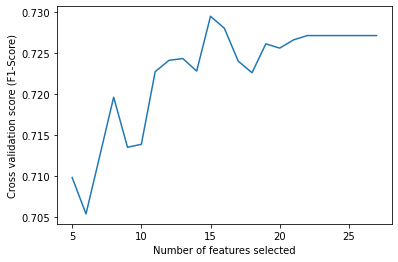

In [125]:
from sklearn.feature_selection import RFECV
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold


min_features_to_select = 5  # Minimum number of features to consider
rfecv = RFECV(
    estimator=clone(my_model),
    step=1,
    cv=StratifiedKFold(5),
    scoring="f1",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(players_prepared, players_label)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (F1-Score)")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
    rfecv.cv_results_['mean_test_score'],
)
plt.show()

In [126]:
feature_importances

array([0.03658016, 0.03682471, 0.04177871, 0.04711154, 0.06345328,
       0.03705877, 0.04434658, 0.        , 0.03193853, 0.        ,
       0.        , 0.04052213, 0.        , 0.        , 0.03214379,
       0.02038953, 0.        , 0.20607047, 0.04554198, 0.03207496,
       0.03522097, 0.04476059, 0.03724798, 0.04569929, 0.03719781,
       0.04384853, 0.04018972], dtype=float32)

In [127]:
np.sort(np.argpartition(feature_importances, -15)[-15:])

array([ 1,  2,  3,  4,  5,  6, 11, 17, 18, 21, 22, 23, 24, 25, 26],
      dtype=int64)

In [128]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

top_15_indices = indices_of_top_k(feature_importances, 15)
np.array(attributes)[top_15_indices]

array(['weight', 'wingspan', 'reach_standing', 'C', 'PF', 'PG', 'PF',
       'yearCombine', 'standing_vertical', 'timeLaneAgility',
       'timeThreeQuarterCourtSprint', 'timeModifiedLaneAgility',
       'lengthHandInches', 'widthHandInches', 'body_fat_pct'],
      dtype='<U27')

In [129]:
sorted(zip(feature_importances, attributes), reverse=True)[:15]

[(0.20607047, 'yearCombine'),
 (0.06345328, 'C'),
 (0.04711154, 'reach_standing'),
 (0.04569929, 'timeModifiedLaneAgility'),
 (0.04554198, 'standing_vertical'),
 (0.044760592, 'timeLaneAgility'),
 (0.044346582, 'PG'),
 (0.043848526, 'widthHandInches'),
 (0.04177871, 'wingspan'),
 (0.04052213, 'PF'),
 (0.040189717, 'body_fat_pct'),
 (0.03724798, 'timeThreeQuarterCourtSprint'),
 (0.037197813, 'lengthHandInches'),
 (0.037058767, 'PF'),
 (0.036824714, 'weight')]

In [130]:
preprocess_and_feature_selection_pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 15))
])

In [ ]:
# joblib.dump(preprocess_and_feature_selection_pipeline,
#             'preprocess_and_feature_selection_pipeline.pkl')


['preprocess_and_feature_selection_pipeline.pkl']

In [131]:
players_prepared_top15_features = preprocess_and_feature_selection_pipeline.fit_transform(players)

In [132]:
players_prepared_top15_features[0:3]

array([[1.876e+02, 7.750e+01, 9.900e+01, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.011e+03, 2.850e+01, 1.105e+01, 3.170e+00,       nan,
        8.500e+00, 9.250e+00, 5.600e+00],
       [2.018e+02, 8.000e+01, 1.000e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.012e+03, 3.300e+01, 1.095e+01, 3.280e+00,       nan,
        8.500e+00, 9.000e+00, 6.000e+00],
       [1.660e+02, 7.200e+01, 9.450e+01, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+03, 3.600e+01, 1.048e+01, 3.060e+00,       nan,
              nan,       nan,       nan]])

In [ ]:
players_prepared[0:3, top_15_indices]

array([[1.876e+02, 7.750e+01, 9.900e+01, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.011e+03, 2.850e+01, 1.105e+01, 3.170e+00,       nan,
        8.500e+00, 9.250e+00, 5.600e+00],
       [2.018e+02, 8.000e+01, 1.000e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.012e+03, 3.300e+01, 1.095e+01, 3.280e+00,       nan,
        8.500e+00, 9.000e+00, 6.000e+00],
       [1.660e+02, 7.200e+01, 9.450e+01, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+03, 3.600e+01, 1.048e+01, 3.060e+00,       nan,
              nan,       nan,       nan]])

# Complete Pipeline from Data Preparation plus Final Prediction

In [134]:
model_2_params = {'gamma': 4.105697122281739,
 'learning_rate': 0.14071152804875842,
 'max_depth': 3,
 'n_estimators': 57,
 'scale_pos_weight': 0.8939897100078704}

In [139]:
preproces_select_and_predict_pipeline = Pipeline([
    ('preparation', preprocess_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 15)),
    ('xgboost_clf', XGBClassifier(**best_params))
])

In [73]:
# joblib.dump(preproces_select_and_predict_pipeline, 'complete_pipeline.pkl')

['complete_pipeline.pkl']

In [ ]:
# param_distribs = {
#     'xgboost_clf__n_estimators': randint(50, 250),
#     'xgboost_clf__gamma': expon(scale=1.0),
#     'xgboost_clf__max_depth': [3,4,5,6],
#     'xgboost_clf__learning_rate': uniform(0, 1),
#     'xgboost_clf__scale_pos_weight': uniform(0, 1)
# }

# rnd_search_complete_pipeline = RandomizedSearchCV(
#     estimator=preproces_select_and_predict_pipeline,
#     param_distributions=param_distribs,
#     n_iter=1000, cv=5,
#     scoring='f1',
#     verbose=1, random_state=42
# )
# rnd_search_complete_pipeline.fit(players, players_label)

In [ ]:
# rnd_search_complete_pipeline.best_params_

In [136]:
complete_pipe_pred = cross_val_predict(preproces_select_and_predict_pipeline, players, players_label)

In [137]:
print(classification_report(players_label, complete_pipe_pred))

              precision    recall  f1-score   support

       False       0.63      0.58      0.61       466
        True       0.72      0.76      0.74       650

    accuracy                           0.68      1116
   macro avg       0.67      0.67      0.67      1116
weighted avg       0.68      0.68      0.68      1116



In [140]:
# joblib.dump(preproces_select_and_predict_pipeline, '../my_models/my_model_3.pkl')

['../my_models/my_model_3.pkl']

Model 1: XGBoostClassifier with RandomizedSearch and all features used<br>
Params
<br>
{'xgboost__gamma': 0.7077225037713452,
 'xgboost__learning_rate': 0.0415728590503921,
 'xgboost__max_depth': 4,
 'xgboost__n_estimators': 69,
 'xgboost__scale_pos_weight': 0.9866301229588469}
<br>
<hr>
<br>
Model 2: XGBoostClassifier with complete pipeline and randomized search with 15 selected features<br>
Params<br>
{'xgboost_clf__gamma': 4.105697122281739,
 'xgboost_clf__learning_rate': 0.14071152804875842,
 'xgboost_clf__max_depth': 3,
 'xgboost_clf__n_estimators': 57,
 'xgboost_clf__scale_pos_weight': 0.8939897100078704}
 <br>
 <hr>
 <br>
 Model 3: Model 2 but with model 1's params

In [141]:
model_1 = joblib.load('../my_models/my_model_1.pkl')
model_2 = joblib.load('../my_models/my_model_2.pkl')
model_3 = joblib.load('../my_models/my_model_3.pkl')

In [50]:
model_1_preds = cross_val_predict(model_1, players_prepared, players_label)

In [51]:
model_2_preds = cross_val_predict(model_2, players, players_label)

In [52]:
model_3_preds = cross_val_predict(model_3, players, players_label)

In [53]:
confusion_matrix(players_label, model_1_preds)

array([[254, 212],
       [157, 493]], dtype=int64)

In [54]:
print(classification_report(players_label, model_1_preds))

              precision    recall  f1-score   support

       False       0.62      0.55      0.58       466
        True       0.70      0.76      0.73       650

    accuracy                           0.67      1116
   macro avg       0.66      0.65      0.65      1116
weighted avg       0.67      0.67      0.67      1116



In [55]:
confusion_matrix(players_label, model_2_preds)

array([[272, 194],
       [159, 491]], dtype=int64)

In [56]:
print(classification_report(players_label, model_2_preds))

              precision    recall  f1-score   support

       False       0.63      0.58      0.61       466
        True       0.72      0.76      0.74       650

    accuracy                           0.68      1116
   macro avg       0.67      0.67      0.67      1116
weighted avg       0.68      0.68      0.68      1116



In [57]:
confusion_matrix(players_label, model_3_preds)

array([[247, 219],
       [150, 500]], dtype=int64)

In [58]:
print(classification_report(players_label, model_3_preds))

              precision    recall  f1-score   support

       False       0.62      0.53      0.57       466
        True       0.70      0.77      0.73       650

    accuracy                           0.67      1116
   macro avg       0.66      0.65      0.65      1116
weighted avg       0.66      0.67      0.66      1116



# ERROR ANALYSIS

So far, model 2 meets the needs of the solution most. It has the best precision, which is what I'm going for. 

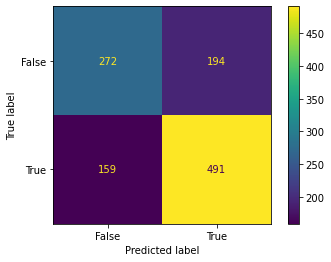

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(players_label, model_2_preds)

In [143]:
y_probas = cross_val_predict(model_2, players, players_label, cv=5, method='predict_proba')

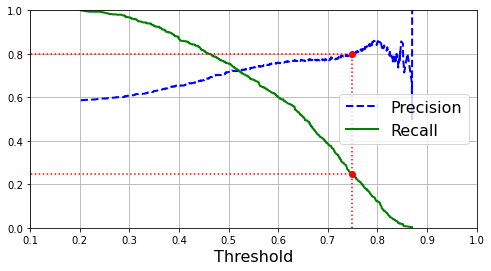

In [144]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(players_label, y_probas[:,1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([0.1, 1, 0, 1])             # Not shown



recall_80_precision = recalls[np.argmax(precisions >= 0.8)]
threshold_80_precision = thresholds[np.argmax(precisions >= 0.8)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_80_precision, threshold_80_precision], [0., 0.8], "r:")                 # Not shown
plt.plot([0, threshold_80_precision], [0.8, 0.8], "r:")                                # Not shown
plt.plot([0, threshold_80_precision], [recall_80_precision, recall_80_precision], "r:")# Not shown
plt.plot([threshold_80_precision], [0.8], "ro")                                             # Not shown
plt.plot([threshold_80_precision], [recall_80_precision], "ro")                             # Not shown
("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [145]:
y_pred_precision = (y_probas > 0.6)

In [146]:
y_pred_precision[:,1]

array([ True,  True, False, ..., False,  True, False])

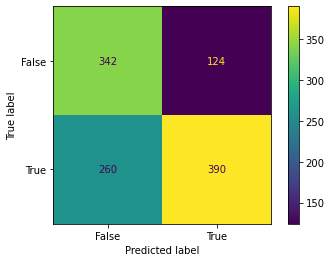

In [147]:
ConfusionMatrixDisplay.from_predictions(players_label, y_pred_precision[:,1])

In [148]:
print(classification_report(players_label, y_pred_precision[:,1]))

              precision    recall  f1-score   support

       False       0.57      0.73      0.64       466
        True       0.76      0.60      0.67       650

    accuracy                           0.66      1116
   macro avg       0.66      0.67      0.66      1116
weighted avg       0.68      0.66      0.66      1116



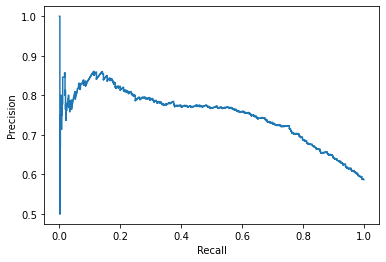

In [161]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc

disp = PrecisionRecallDisplay(precisions, recalls)
disp.plot()

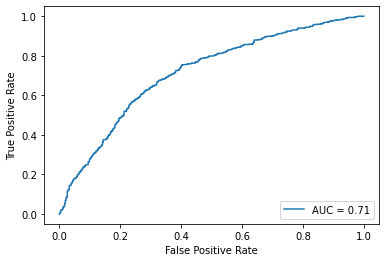

In [162]:
fpr, tpr, thresholds = roc_curve(players_label, y_probas[:,1])

roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot();

In [153]:
final_model = model_2.fit(players, players_label)

In [154]:
joblib.dump(final_model, '../my_models/final_model.pkl')

['../my_models/final_model.pkl']